# Assignment #2 - Classification



## <font color="blue"> Tanvi Vijay Rasam</font>

# I. Introduction


The aim of a classification problem is to identify the category/class to which a new data will fall under.In this assignment 4 classification models viz Pocket Algorithm, Gaussian Discriminant Analysis (QDA and LDA) and Logistic Regression are implemented and compared based on different metrics like Accuracy, f1 score ROC, etc. Here the income range of a adult is prediced ie. whether a adult belongs to >50K range or <=50K range. This is a Classification task with two possible outcomes. thus binary classification is performed. For each approach, the train method fits the model for the given train data X and train label y and the use medthod predicts the traget label for unseen test data using the model learned. Pocket algorithm is an example of Linear Classification where linear model is applied for classification. GDA is a generative learning algorithm in which we assume p(x|y) is distributed according to a multivariate normal distribution and p(y) is distributed according to Bernoulli. Algorithms that model p(y|x) directly from the training set are called discriminative algorithms like Logistic Regression and which model p(x|y) are generative learning algorithm.Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable.

# II. Data


## Introduction of data for Classification & Source 

### 1.1 Description of the Dataset

Census is an enumeration of the members of a given population, which takes place once a decade in the entire country. The census data is very valuable since it provides critical insights in econimical,social, housing and education domain. Adult dataset is an aggregation of different country's censuses.This dataset is derived from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). It is a multivariate dataset containing 32560 instances and 15 attributes. Dataset is constructed by satisfyting the following condition : Age> 16, Adjusted-Gross-Income> 100, Final weight (fnlwgt)> 1 and hrs/week > 0.

Goal: To predict whether the income would be > 50𝐾/𝑦𝑟 𝑜𝑟 <= 50K/yr

### 1.2 Description of the Data

##### 1.2.1 Categorical Attributes

 workclass: which sector the individual is working
            values:Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
            
 education: Individual's highest level of education
            values:Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters,1st-4th, 10th, Doctorate, 5th-6th, Preschool
            
 marital-status: Individual marital status
                 values:Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent,Married-AF-spouse.
                 
 occupation: What job individual does
             values:Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners,Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv,                        Armed-Forces.   
             
 relationship: Individual's relation in a family
               values: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
               
 race: Individual's Race 
       values: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
       
 sex: Gender
      values: Female, Male.
      
 native-country: where individual belongs to 
                 values: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India,Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam,                              Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia,                                  Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-                              Salvador, Trinadad&Tobago, Peru,Hong, Holand-Netherlands.
                 
##### 1.2.2 Continuous Attributes

age: Individual's age
     value :continuous.
     
education-num: Individual's number of years of education
               value: continuous
               
fnlwgt: final weight ie. the number of units in the target population that the responding unit represents
        value :continuous           
        
capital-gain: Individual's gain in income through other investments
              values: continuous
              
capital-loss: Individual's loss in income through other investments
              values: continuous
              
hours-per-week: hrs worked by individual per week
                values: continuous.
                
##### 1.3 Source: UCI Machine Learning Repository :https://archive.ics.uci.edu/ml/datasets/Adult

### Reading the Data


### 2.1 Importing the required packages for the Assignment

In [1]:
import pandas as pd # storing and mnipulating the dataset
import matplotlib.pyplot as plt # for data visualization 
import seaborn as sns # for data visualization 
import warnings  
warnings.filterwarnings("ignore") # to not display any warnings generated 
import numpy as np # for array computations

### 2.2 Reading the data from csv file

In [2]:
adult_df= pd.read_csv('adult.csv',nrows=10000) #df_assg1 holds the dataset
adult_df.head() #displacing the first 5 records

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


## Preprocessing of the data

### 3.1 Adding title to the dataset

In [3]:
adult_df.columns= ['age','workclass','fnlwgt','education','education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','income_per_year']
adult_df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_per_year
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


### 3.2 Deleting Null values

In [4]:
# Get dataset Info
adult_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
age                10000 non-null int64
workclass          10000 non-null object
fnlwgt             10000 non-null int64
education          10000 non-null object
education_num      10000 non-null int64
marital_status     10000 non-null object
occupation         10000 non-null object
relationship       10000 non-null object
race               10000 non-null object
sex                10000 non-null object
capital_gain       10000 non-null int64
capital_loss       10000 non-null int64
hours_per_week     10000 non-null int64
native_country     10000 non-null object
income_per_year    10000 non-null object
dtypes: int64(6), object(9)
memory usage: 1.1+ MB


In [5]:
# Thus none of the columns have null values, but what if some other symbol is used to represent null value
# check this by displaying unique
print(adult_df.workclass.unique())
adult_df.shape

[' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']


(10000, 15)

In [6]:
# There is  a '?' type which represents null
# Removing it
# First finding which other columns contain '?'

In [7]:
adult_df=adult_df[adult_df.workclass!= ' ?']
adult_df=adult_df[adult_df.marital_status!= ' ?']
adult_df=adult_df[adult_df.education!= ' ?']
adult_df=adult_df[adult_df.occupation!= ' ?']
adult_df=adult_df[adult_df.relationship!= ' ?']
adult_df=adult_df[adult_df.age!= ' ?']                  
adult_df=adult_df[adult_df.race!= ' ?']                  
adult_df=adult_df[adult_df.sex!= ' ?']    
adult_df=adult_df[adult_df.hours_per_week!= ' ?']
adult_df=adult_df[adult_df.native_country!= ' ?']
adult_df=adult_df[adult_df.income_per_year!= ' ?']
adult_df=adult_df[adult_df.education_num!= ' ?']
adult_df=adult_df[adult_df.fnlwgt!= ' ?']
adult_df=adult_df[adult_df.capital_gain!= ' ?']
adult_df=adult_df[adult_df.capital_loss!= ' ?']     

adult_df.shape

(9244, 15)

### 3.3 Replacing Categorical attr with numeric

In [8]:
adult_df['income_per_year'].replace(' >50K' ,1, inplace=True )
adult_df['income_per_year'].replace(' <=50K' ,-1, inplace=True )
adult_df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_per_year
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,-1
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,-1
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,-1
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,-1
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,-1


In [9]:
adult_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9244 entries, 0 to 9999
Data columns (total 15 columns):
age                9244 non-null int64
workclass          9244 non-null object
fnlwgt             9244 non-null int64
education          9244 non-null object
education_num      9244 non-null int64
marital_status     9244 non-null object
occupation         9244 non-null object
relationship       9244 non-null object
race               9244 non-null object
sex                9244 non-null object
capital_gain       9244 non-null int64
capital_loss       9244 non-null int64
hours_per_week     9244 non-null int64
native_country     9244 non-null object
income_per_year    9244 non-null int64
dtypes: int64(7), object(8)
memory usage: 1.1+ MB


## Visualizing the data

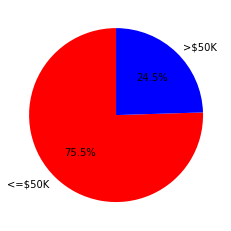

In [9]:
#Percentange of Labels present

label_count = [len(adult_df[adult_df['income_per_year'] == -1]),len(adult_df[adult_df['income_per_year'] == 1])]
label = ['<=$50K', '>$50K']
colors = ['r', 'b']
plt.pie(label_count, labels=label, colors=colors, startangle=90, autopct='%.1f%%')
plt.show()

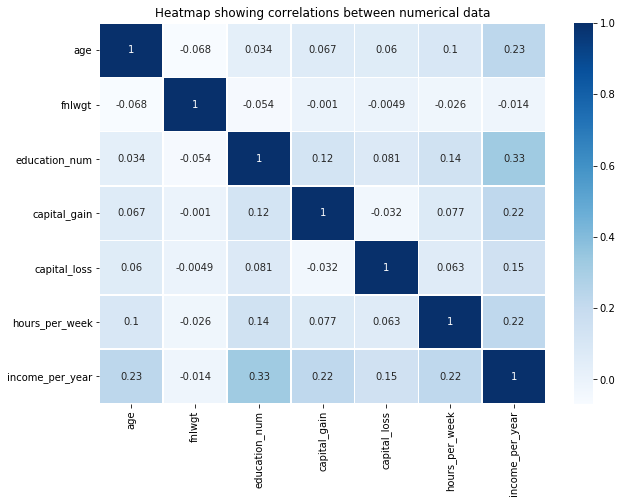

In [11]:
# Observing the covariance Matrix

plt.figure(figsize=(10,7))  
sns.heatmap(adult_df.corr(),annot=True,linewidths=.5, cmap="Blues")
plt.title('Heatmap showing correlations between numerical data')
plt.show()

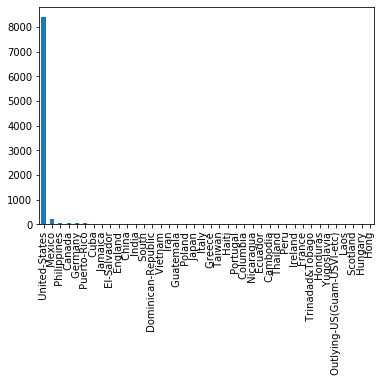

In [12]:
df2= adult_df['native_country'].value_counts()
df2.plot(kind='bar')

posx and posy should be finite values
posx and posy should be finite values


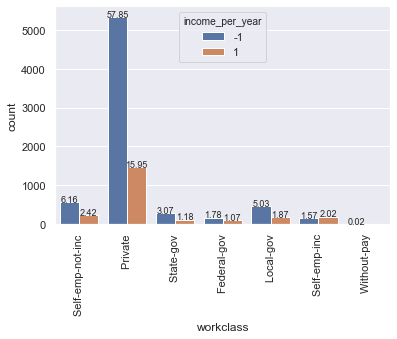

In [13]:
# Salaries of different workclass
sns.set(style="darkgrid")
ax = sns.countplot(x="workclass",hue="income_per_year", data=adult_df)
total=float(len(adult_df))
for p in ax.patches:
    height = p.get_height()
    if height < 0 :
        height = 0;
    ax.text(float(p.get_x()+p.get_width()/2), 
               float(height),
            '{:1.2f}'.format((height/total)*100),
            ha="center",fontsize=9) 
plt.xticks(rotation=90)
plt.show()

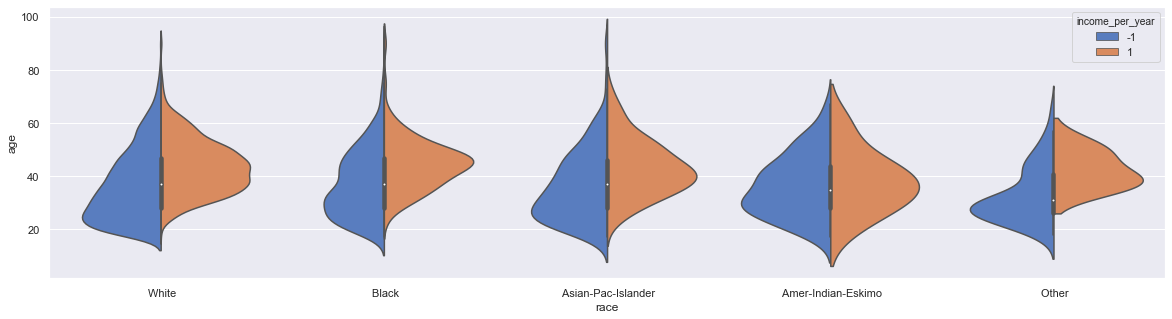

In [14]:
from matplotlib import pyplot
a4_dims = (20, 5)
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.violinplot(x="race", y="age", hue="income_per_year",
                    data=adult_df, gridsize=100, palette="muted", split=True, saturation=0.75)
ax

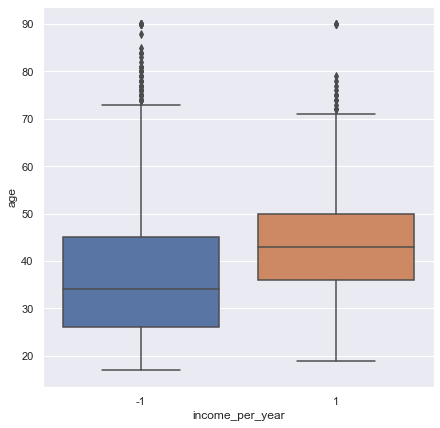

In [15]:
fig = plt.figure(figsize=(7,7)) 
sns.boxplot(x="income_per_year", y="age", data=adult_df)
plt.show()

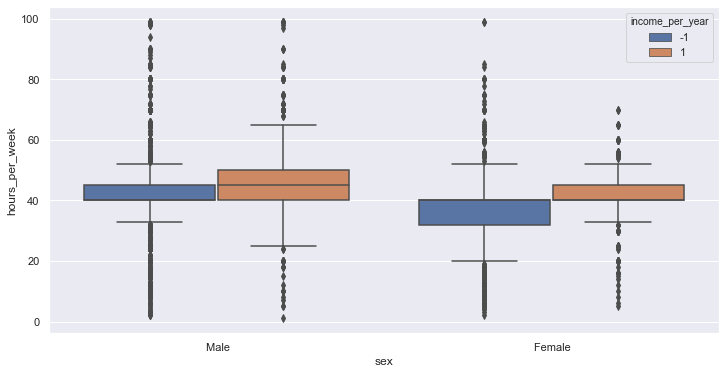

In [16]:
plt.figure(figsize=(12,6))
sns.boxplot(x='sex',y ='hours_per_week', hue='income_per_year',data=adult_df)
plt.show()

## Preliminary Observations

Observation 1: Most of the records are in <=$50K Category ( around 3/4th)

Observation 2: Most of the people have their native country as US as the data is taken from it and others are immigrants

Observation 3: Around 75% of the population is working in the private sector.Sel- employed is the only sector where there are more people with >50 𝐾 𝑡ℎ𝑎𝑛 <= 50K

Observation 4:Approx 40 is the age in all races where maximum people are earning > 50𝐾 .𝐸𝑎𝑟𝑙𝑦 20𝑠 𝑡𝑜 30 𝑚𝑎𝑥𝑖𝑚𝑢𝑚 𝑝𝑒𝑜𝑝𝑙𝑒 𝑎𝑟𝑒 𝑖𝑛<=50K income category .For Asisn-Pac-Islander and Amer-India-Eskimo race the number of people in > 50𝐾𝑎𝑛𝑑<= 50K seems to be balanced

Observation 5: The mean "age" for Income group(> 50𝑘) 𝑖𝑠 𝑚𝑜𝑟𝑒 tℎ𝑎𝑛 𝐼𝑛𝑐𝑜𝑚𝑒 𝑔𝑟𝑜𝑢𝑝 (<= 50k)

Observation 6: Male in the income of>50𝐾 𝑎𝑟𝑒 𝑒𝑥𝑝𝑒𝑐𝑡𝑒𝑑 𝑡𝑜 𝑤𝑜𝑟𝑘 𝑓𝑜𝑟 𝑙𝑎𝑟𝑔𝑒𝑟 ℎ𝑟𝑠 𝑡ℎ𝑎𝑛 𝑓𝑒𝑚𝑎𝑙𝑒 𝑖𝑛 𝑡ℎ𝑎𝑡 𝑐𝑎𝑡𝑒𝑔𝑜𝑟𝑦. 𝐹𝑒𝑚𝑎𝑙𝑒 𝑖𝑛 𝑡ℎ𝑒𝑐 𝑎𝑡𝑒𝑔𝑜𝑟𝑦 𝑜𝑓 𝑖𝑛𝑐𝑜𝑚𝑒 <= 50K have more flexible working hrs starting from 18 hrs/week that the male in that category

### From the above plots, selecting only the relevant features for model training

In [10]:
adult_df.drop(['fnlwgt','native_country','race','workclass','occupation','education','marital_status','relationship','capital_gain','capital_loss','sex'],axis=1,inplace=True)
adult_df =pd.get_dummies(adult_df)


In [11]:
adult_df.head()

,age,education_num,hours_per_week,income_per_year
0,50,13,13,-1
1,38,9,40,-1
2,53,7,40,-1
3,28,13,40,-1
4,37,14,40,-1


In [12]:
x_train=adult_df.loc[:,adult_df.columns!='income_per_year']
y_train=adult_df.loc[:,adult_df.columns=='income_per_year']
df=np.hstack((x_train,y_train))


In [13]:
names= np.concatenate((x_train.columns,'income_per_year'),axis=None)
df=pd.DataFrame(df,columns=names)
df.head()
#names.size

,age,education_num,hours_per_week,income_per_year
0,50,13,13,-1
1,38,9,40,-1
2,53,7,40,-1
3,28,13,40,-1
4,37,14,40,-1


In [14]:
y_train.shape

(9244, 1)

In [22]:
x_train.shape

(9244, 3)

In [23]:
df.shape

(9244, 4)

In [24]:
c_relation=df.corr()

In [26]:
c_relation['income_per_year'].sort_values(ascending = False)

income_per_year    1.000000
education_num      0.327875
age                0.232041
hours_per_week     0.222266
Name: income_per_year, dtype: float64

# III. Method



# Pocket algorithm

The Perceptron Learning Algorithm is one of the simplest machine learning algorithms and a crucial building block of more complex machine learning and deep learning models.A single perceptron is a linear model that applies a step function on the linear output. For classification, it iterate over the training examples, and update the weights in a way that would result in correct classification. For a instance, it updates the weight by the equation- $w^{(k+1)}=w^{(k)}+αt_ix_i$, when y-predicted of that instance doesn't match with the actual y. We need to set the maximum number of iteration for training as when data is not linearly seperable, then there is no guarantee on convergence. A simple modification of this algorithm is termed the Pocket Learning Algorithm. 
In pocket algorithm, the best solution so far is kept in its pocket. Thus, w-pocket will contain the best solution so far.The best solution is when the number of misclassification is least. When a new weight is computed ie. w(k+1) it is checked with the complete training data. If the w(k+1) produced smaller no. of misclassification than the weights in the pocket, then update w-pocket to w(k+1) else keep it unchanged and discard the new weights. At the end of training or after maximum no. of iterations, weights in the pocket are returned rather than the weights computed at the last iteration.The pocket algorithm solves the stability problem of perceptron.

# Discriminant Analysis 

Algorithms that model p(y|x) directly from the training set are called discriminative algorithms.For binary classification problem, where we need to distinguish between two classes, we first take all the instances belonging to class A and build a model on it and then go for instances of class B and build a model for that. Thus we have p(y) and p(x|y). After this for testing, the new instance is ran on both the models and with model gives the highest probability that class is assigned to it. In this approach we try to model p(x|y) and p(y) as oppose to p(y|x) which is called Generative Learning Algorithms.Once we learn the model p(y) and p(x|y) using training set, we use Bayes Rule to derive the p(y|x) as
$ p(y|x)= \frac{p(x|y)p(y)}{p(x)}  $

The aim of discriminant analysis is to develop discriminant functions which is a linear combination of independent variables that will discriminate between the categories of the dependent variable

One good assumption for p(x|y) is Gaussian Model.
$$
p(x | y) = \frac{1}{(2\pi)^{\frac{d}{2}} \vert \boldsymbol\Sigma_k \vert^{\frac{1}{2}}} e^{ -\frac{1}{2} (x - \boldsymbol\mu_k)^\top \boldsymbol\Sigma_k^{-1} (x - \boldsymbol\mu_k) }.
$$

where, $ \boldsymbol\mu_k $ is the mean for each feature of all instances belonging to class k and  $ \boldsymbol\Sigma_k$ is the varriance for each feature of all instances belonging to class k

Thus, for a classification problem in which the input features are continuous random variable, Discriminant Analysis can be used, it’s a generative learning algorithm in which we assume p(x|y) is distributed according to a multivariate normal distribution and p(y) is distributed according to Bernoulli.
       

# QDA


QDA is  an extension to LDA except that here we assume that the covariance matrix is different for each class and so, we will estimate the covariance matrix $ \boldsymbol\Sigma_k$ separately for each class k

the discriminant function $\delta_k(x)$ can be defined as
$$
\delta_k(x) = -\frac{1}{2} \ln \vert \boldsymbol\Sigma_k \vert - \frac{1}{2} (x - \boldsymbol\mu_k)^\top \boldsymbol\Sigma_k^{-1} (x - \boldsymbol\mu_k) + \ln P(T = k). 
$$

Classification rule:

$$
y = \arg\max_k \delta_k(\tilde{x}). 
$$

Here we find the class k which maximizes the quadratic discriminant function.

The decision boundary is placed where the discriminant functions meet such as  𝛿1==𝛿2 .This discriminant function is a quadratic function.Thus, the decision boundary is quadratic.
QDA fits the data better than LDA as it allows for more flexibility with the covariance matrix. But it faces problem when there more no. of classes and less data points for each class.


# LDA

LDA assumes that dependent variables are normally distributed (Gaussian distribution) and that the different classes have class-specific means and equal variance/covariance. It is more stable than the logistic regression for multi-class classification problems. But if the normal distribution and eqyal covariance property is voilated then logistic regression outperforms LDA.

Disciriminant function is given as: 

$$
\delta_k(x) = x^\top \boldsymbol\Sigma^{-1} \boldsymbol\mu_k -\frac{1}{2} \boldsymbol\mu_k^\top \boldsymbol\Sigma^{-1}\boldsymbol\mu_k + \ln P(T = k).
$$

the covariance matrix $\boldsymbol\Sigma$ can be chosen as an average of all the covariance matrices for all classes,

$$
\boldsymbol\Sigma = \sum_k^K \frac{N_k}{N} \boldsymbol\Sigma_k.
$$

LDA separates the two classes with a hyperplane. This means that the two classes have to pretty much be two separated masses, each occupying half of the space. 


# Logistic Regression.

Logistic regression is a classification algorithm used to assign a discrete set of classes given a instance. Like linear regression it will compute the predicted value using the equation - $ z=W_0+W_1X_1+W_2x_2+..W_NX_N $. then this value is transformed, ie. fitted between 0 and 1, basically getting its probability by using the logistic sigmoid function. Thus, for a instance logistic sigmoid function will return probability of that instance being in every class present. The class with the highest probability is then assigned to that instance.
Sigmoid Function is given as- 
$$ S(z)=\frac{1}{1+e^{−z}} $$

S(z)  = output between 0 and 1 (probability estimate)

z = input to the function (your algorithm’s prediction e.g. mx + b)

e = base of natural log

Above prediction function returns a probability score between 0 and 1. In order to map this to a discrete class, we select a threshold value or tipping point above which we will classify values into class 1 and below which we classify values into class 2.
Thus,Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable

### A. Super Classs Definition

In [15]:
import numpy as np
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    

class Classifier(BaseModel):
    """
        Abstract class for classification 
        
        Attributes
        ==========
        meanX       ndarray
                    mean of inputs (from standardization)
        stdX        ndarray
                    standard deviation of inputs (standardization)
    """

    def __init__(self, ):
        self.meanX = None
        self.stdX = None

    def normalize(self, X):
        """ standardize the input X """
        
        if not isinstance(X, np.ndarray):
            X = np.asanyarray(X)

        self.meanX = np.mean(X, 0)
        self.stdX = np.std(X, 0)
        Xs = (X - self.meanX)/self.stdX
        return Xs

    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        pass
    
    @abstractmethod
    def use(self, X):
        pass 

## Explanation of code

A super class named BaseModel is defined with abstract methods train and use, train method accepts two parameters Training data's independent variables and Training data's dependent variable and the use method accepts one parameter- Testing data's independent variables. This class is a base class for Classifier. In Classifier class,_check_matrix method checks if the passed matrix is 2-Dimentional or not as this is critical for matrix multiplication. add_ones method attaches a array of size- number of instances X 1 to the matrix passed. This column acts like the basis. It inherits the train and use method of base class BaseModel but doesn't defines it.Normalize method normalizes the instances of X by using the formula- (x-mean)/std. Here, passed x is first checked if it is of type Numpy Array. Pocket, Qda, Lda and LogisticRegression inherits the Classifier class.

### B. Pocket Algorithm


In [17]:
from IPython.core.debugger import set_trace
from copy import deepcopy as copy 

class Pocket(Classifier):
    
    def __init__(self, ):
        self.w_pocket=None
        
        
# return 1 if w is better -1 if wp is better
    def compare(self,X, T, w, wp):
        T=T.reshape(1,-1)
        y = np.sign(X @ w)
        yp = np.sign(X @ wp)
        return 1 if np.sum(y == T) >= np.sum(yp == T) else -1
    
    
    
    def train(self, X, T):
        maxiter = 30
        alpha = 0.1
        Y1=T
        X=super().normalize(X)
        X1 = super().add_ones(X)
        
        w = np.zeros(X1.shape[1])
        self.w_pocket = copy(w)

       
        for i in range(maxiter):
   
            converged = True
    
    
            for k in range(X1.shape[0]):
                   y = w @  X1[k,:]
                   if np.sign(y) != np.sign(Y1[k]):
                        w += alpha * Y1[k] * X1[k,:]
                        converged = False
            ##### additional for pocket algorithm 
                        if self.compare(X1, Y1, w, self.w_pocket) > 0: 
                            self.w_pocket[:] = w[:]
            if converged:
                print("converged at ", i)
                break
        print("End of training: ", i)


    def use(self, X):
        X=super().normalize(X)
        X1 = super().add_ones(X)
        return np.sign(X1@self.w_pocket)

### Explanation of Code

In pocket algorithm, the best solution so far is kept in its pocket. Thus, w-pocket will contain the best solution so far.
The train method accepts two parameters X_train and y_train to train the model ie. to estimate w-pocket. maxiter specifies  maximum number of times training on data will occur. Aplha is the learning rate. Scaling is done for X_train. the 'converged' variable will basically detect when the predicted y equals the actual y for that instance. the compare method checks if w is better or w-pocket is better by using w and w-pocket on the entire training dataset and then checking which one fitted the data accurately. If w-pocket predicted better than w then w-pocket is unchanged else w is copied into w-pocket.
In the use method, prediction for test data is done by passing X_test. Only the signs of values returned by X1 @ self.w_pocket ie. 1 and -1 are returned as predictions for class >50K and <=50K





### C. QDA

In [29]:
class Qda(Classifier):
        # define QDA discriminant function
        
    def __init__(self, ):
        self.mu1 = None
        self.mu2 = None
        self.Sigma1=None
        self.Sigma2=None
        self.prior1=None
        self.prior2=None
        
        self.prob1=None
        self.prob2=None
        
    
    def QDA(self,X, mu, sigma, prior):
        sigma_inv = np.linalg.inv(sigma)
        diffv =np.asarray(X - mu)
        
        return -0.5  * np.log(np.linalg.det(sigma))- 0.5 * np.sum(diffv @ sigma_inv * diffv, axis=1)+ np.log(prior)


# QDA train

   
## compute the mean and covariance
    def  train(self, X, T):
       
        
        X1=super().normalize(X)
        
        df=np.hstack((X1,T))
        names= np.concatenate((X.columns,'income_per_year'),axis=None)
        df1=pd.DataFrame(df,columns=names)
        class1=df1[df1['income_per_year']==1]
        class2=df1[df1['income_per_year']==-1]
        
        class1=class1.iloc[:,class1.columns!='income_per_year']
        class2=class2.iloc[:,class2.columns!='income_per_year']
        
        self.mu1 = np.mean(class1,0)
        self.mu2 = np.mean(class2,0)
        self.Sigma1 = np.cov(class1.T)
        self.Sigma2 = np.cov(class2.T)
        #print(self.Sigma1)   
        if np.linalg.det(self.Sigma1)==0:
            print("Singular")
        else:print("non Singular")
        if np.linalg.det(self.Sigma2)==0:
            print("Singular")
        else:print("non Singular")
            
        self.prior1 = len(class1) / (len(class1) + len(class2))
        self.prior2 = len(class2) / (len(class1) + len(class2))
        

## now compute the discriminant function on test data
    def use(self, X):
        X1=super().normalize(X)
           
        
        d1 = self.QDA(X1, np.matrix(self.mu1), self.Sigma1, self.prior1)
        d2 = self.QDA(X1, np.matrix(self.mu2), self.Sigma2, self.prior2)
              
        self.prob1 = np.exp( d1.reshape(X.shape[0],1) - 0.5*X.shape[1]*np.log(2*np.pi) - np.log(self.prior1))
        self.prob2 = np.exp( d2.reshape(X.shape[0],1) - 0.5*X.shape[1]*np.log(2*np.pi) - np.log(self.prior2))
        #print(self.prob2)
        self.prob1=np.array(self.prob1).flatten()
        self.prob2=np.array(self.prob2).flatten()
        df = pd.DataFrame({'prob1':self.prob1, 'prob2':self.prob2})
        pred=np.where(df['prob1']>df['prob2'],1,-1)
        return pred,self.prob1,self.prob2,d1,d2
        
           


### Explanation of Code

The train and use method performs the same task as the pocket algorithm's methods. In train method, we calculate the mean, standard deviation and prior for each class by seperating the X_train on the income_per_year column. We also check if Sigma matrix is singular or not as if it is Singular then its inverse cannot be computed. Mean will be a vector of size equal to D-dimensions and Sigma will be D X D matrix.
In use method, we compute the discriminant functions for each class. This is done by passing the mean, sigma and prior of each class along with X_test by calling the QDA method using the formula-

$$
\delta_k(x) = -\frac{1}{2} \ln \vert \boldsymbol\Sigma_k \vert - \frac{1}{2} (x - \boldsymbol\mu_k)^\top \boldsymbol\Sigma_k^{-1} (x - \boldsymbol\mu_k) + \ln P(T = k). 
$$

From the  discriminant function values, probability for each class is calculated. Depending on which class's probability is greater, that class is assigned to the instance. Finally it returns the prediction, probabilities and  discriminant functions for plotting and checking.
discriminant function variable and probability variable is of size = no. of rows in X_test

### D. LDA

In [30]:
class LDA(Classifier): 
    
    
    def __init__(self):
        Classifier.__init__(self)
        self.mu1 = None
        self.mu2 = None
        self.Sigma=None
        self.prior1=None
        self.prior2=None
        
        self.prob1=None
        self.prob2=None
        
        
        
    @staticmethod    
    def LDA(X, mu, sigma, p):
        sigma_inv = np.linalg.inv(sigma)
        mu=np.asarray(mu)
        return np.sum((X @ sigma_inv) * mu - 0.5 * (mu @ sigma_inv) * mu, axis=1) + np.log(p)
    
    
    def train(self,X,T):
        X1=super().normalize(X)
        
        df=np.hstack((X1,T))
        names= np.concatenate((X.columns,'income_per_year'),axis=None)
        df1=pd.DataFrame(df,columns=names)
        
        class1=df1[df1['income_per_year']==1]
        class2=df1[df1['income_per_year']==-1]
        df1= df1.loc[:,df1.columns!='income_per_year']
        #print(df1)
        class1=class1.iloc[:,class1.columns!='income_per_year']
        class2=class2.iloc[:,class2.columns!='income_per_year']
        
        self.mu1 = np.mean(class1,0)
        self.mu2 = np.mean(class2,0)
        self.Sigma = np.cov(df1.T)
        print(self.Sigma.shape)
        if np.linalg.det(self.Sigma)==0:
            print("Singular")
        else:print("non Singular")
            
        self.prior1 = len(class1) / (len(class1) + len(class2))
        self.prior2 = len(class2) / (len(class1) + len(class2))
        
        
    def use(self,X):
        X=self.normalize(X)
        d1=self.LDA(X,np.matrix(self.mu1),self.Sigma,self.prior1)
        d2=self.LDA(X,np.matrix(self.mu2),self.Sigma,self.prior2)
        
        d1=np.array(d1).flatten()
        d2=np.array(d2).flatten()
        
        df = pd.DataFrame({'d1':d1, 'd2':d2})
        y=np.where(df['d1']>df['d2'],1,-1)
        
        return y,d1,d2
        
        

### Explanation of code

LDA's train and use methods are similar to QDA's except that in train method of LDA, Sigma for the entire X_train passed is calculated rather than for individual classes.In the LDA method, discriminant function for each class is computed by the formula-

$$
\delta_k(x) = x^\top \boldsymbol\Sigma^{-1} \boldsymbol\mu_k -\frac{1}{2} \boldsymbol\mu_k^\top \boldsymbol\Sigma^{-1}\boldsymbol\mu_k + \ln P(T = k).
$$

The use method returns predicted y-values for X_test by comparing the discriminant values. If discriminant value from d1 is greter than d2 then 1 is returned else -1 is returned. Thus, use function will evaluate d1 and d2 by calling LDA and then checking the greater value and assigning the class -1 and 1 accordingly and returns prediction and d1,d2.

### E. Logistic Regression

In [31]:
class Logistic(Classifier): 

    def __init__(self,alpha):
        Classifier.__init__(self)
        self.w = None
        self.alpha = alpha
    
    def sigmoidfunc(self,z):
        if not isinstance(z, np.ndarray):
            z = np.asarray(z)
        f = np.exp(z) 
        return f / (np.sum(f, axis=1, keepdims=True) if len(z.shape) == 2 else np.sum(f))

    def g(self,X, w):
        return self.sigmoidfunc(X @ w) 
        
    
    def train(self, X, T):
        X = self.normalize(X)

       
        N = X.shape[0]
        D = X.shape[1]
        K = len(np.unique(T))
        
        self.w = np.zeros((D+1, K))
        niter = 10
        X = self.add_ones(X)
        T = self.add_ones(T.reshape(-1,1))
        T[:,0]=T[:,1]
        T[T[:,0]==1]=0
        (T[:,1])[T[:,1]==0]=1
        (T[:,0])[T[:,0]==-1]=1
        T[T==-1]=0
        for step in range(niter):
            ys = self.g(X,self.w)
            self.w += self.alpha * X.T @ (T - ys) 
              
    
    
    def use(self, X):
        Xs = self.normalize(X)
        Xs = self.add_ones(Xs)
        
        #df = pd.DataFrame({'result':self.g(Xs, self.w)})
        #y=np.where(df['result']>df['d2'],-1,1)
        y=self.g(Xs, self.w)
        y = np.argmax(y, 1)
        y[y==0]=-1
        return y 

### Explanation of Code

Like linear regression it will compute the predicted value using the equation - $ z=W_0+W_1X_1+W_2x_2+..W_NX_N $. then this value is transformed, ie. fitted between 0 and 1, basically getting its probability by using the logistic sigmoid function.
The train method accepts, X_train and y_train as inputs to develop a model. It calculates values of D and K. D=number of features, K = number of unique classes in T.
The for loop is train method specifies the no. of times the training will happed to fit w. 'g' method computes the dot product of X and w ie. it basically predicts the value of y like in linear regression. This prediction value is then passed to sigmoidfunc to convert it into probability which is sreturned back to the train method. Then the differences between actual and predicted value is calculates and the weights are updated.
The use method first calculates the predicted value for X_test using the 'g' function and the computes probability of each class by using the sigmoidfunc. 
Then from the returned probabilities of each class, we compute the final class for y using the argmax function which will return the index of the highest value along a axis. The index returned will be 0 and 1 but the classes are specified as 1 and -1 so I just replaced 0's to -1 here.

# IV. Experiments



### Discussion on evaluation metrics

### Confusion Matrix
A confusion matrix is a table that is often used to describe the performance of a classification model on a set of test data for which the true values are known.
True Positive — Label which was predicted Positive and is actually Positive 
True Negative — Label which was predicted Negative and is actually Negative
False Positive — Label which was predicted as Positive, but is actually Negative
False Negatives — Labels which was predicted as Negative, but is actually Positive 

### Accuaray
It is the ratio of number of correct predictions to the total number of input samples. It is given as $$ \frac{TP + TN}{P + N} $$

### Precision
It is the fraction of relevant instances among the retrieved instances
$$ \frac{TP}{TP + FP} $$

### Recall
Recall is how many of the true positives were recalled (found), i.e. how many of the correct hits were also found.
$$ \frac{TP}{TP + FN} $$

### Specificity
It is also referred to as ‘True Negative Rate’, i.e. more True Negatives the data hold the higher its Specificity.
$$ \frac{TN}{TN + FP} $$

### ROC AUC Score
The plot of ‘True Positive Rate’ (Sensitivity/Recall) against the ‘False Positive Rate’ (1-Specificity) at different classification thresholds.The area under the ROC curve (AUC ) measures of how well a parameter can distinguish between two diagnostic groups.
A random classifier has an area under the curve of 0.5, while AUC for a perfect classifier is equal to 1.


### F1 score
Harmonic mean of Precision & Recall, used to indicate a balance between Precision & Recall providing each equal weightage, it ranges from 0 to 1. F1 Score reaches its best value at 1 (perfect precision & recall) and worst at 0


# Partitioning data

In [18]:
def partition(X, T, ratio=[0.70, 0.30]):
    assert(np.sum(ratio) == 1)
   
    # shuffle the data indices
    idxs = np.random.permutation(X.index)
   
    # the number of samples
    N = X.shape[0]
   
    Xs = []
    Ts = []
    i = 0  # first index to zero
    for k, r in enumerate(ratio):
        nrows = int(round(N * r))  # number of rows
       
        if k == len(ratio) -1:
            Xs.append(X.iloc[i:, :])
            Ts.append(T.iloc[i:, :])
        else:
            Xs.append(X.iloc[i:i+nrows, :])
            Ts.append(T.iloc[i:i+nrows, :])
       
        i += nrows
   
    return Xs, Ts

Above fuction is partitioning the data randomly in 70 is to 30% format for train and test data respectively.

In [19]:
#Partition

from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection

scaler = StandardScaler()


Xlst, Tlst = partition(x_train, y_train)

X_train, X_test = [xx.values for xx in Xlst]
y_train, y_test = [tt.values for tt in Tlst]

#X_train = pd.DataFrame(X_train,columns=x_train.columns)
#X_test = pd.DataFrame(X_test,columns=x_train.columns)
#y_train = pd.DataFrame(T_train,columns=y_train.columns)
#y_test = pd.DataFrame(T_test,columns=y_train.columns)


## Pocket Algorithm

In [20]:
pocket= Pocket()
pocket.train(X_train,y_train)
y_predicted_train=pocket.use(X_train)
y_predicted=pocket.use(X_test)

End of training:  29


Pocket has iterated over the complete maxiter thus it has not converged

### Plots

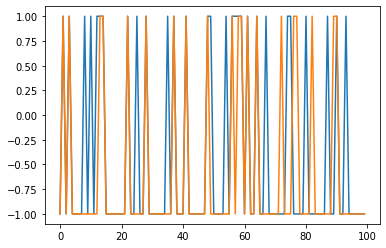

In [21]:
# for test
y=y_test[:100]
plt.plot(y)
plt.plot(y_predicted[:100])

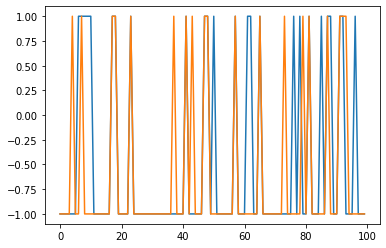

In [22]:
# for train
y=y_train[:100]
plt.plot(y)
plt.plot(y_predicted_train[:100])

### Analysis

The above diagrams plots the actual and predicted values of X_test and X_train. Misclassification's for the test data seems to be more than train data for the first 100 instances of each. But, for actual conclution its better to stick to evaluation metrics.


### Evaluation Metrics

In [37]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report,accuracy_score, f1_score


### For Train Data

### Accuracy 

In [38]:
print('Accuracy:', accuracy_score(y_train,y_predicted_train))


Accuracy: 0.7873589862463298


### F1 Score

In [39]:
print('F1 score:', f1_score(y_train,y_predicted_train))

F1 score: 0.4620797498045348


### For Test Data

### Confusion Matrix

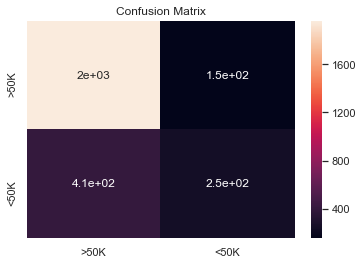

In [40]:
ax= plt.subplot()

cm= confusion_matrix(y_test, y_predicted)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
label=['>50K','<50K']
#sns.heatmap(cnf_matrix, annot=True, ax = ax)

df_cm = pd.DataFrame(cm, index = [i for i in label],columns = [i for i in label])
#plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)

In [41]:
tn, fp, fn, tp = confusion_matrix(y_test, y_predicted).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  1960
False Positives:  154
False Negatives:  407
True Positives:  252


### Accuracy 

In [42]:
Accuracy = (tn+tp)*100/(tp+tn+fp+fn) 
print("Accuracy in %",Accuracy)

Accuracy in % 79.76920302921025


### Precision

In [43]:
Precision = tp/(tp+fp) 
print("Precision ",Precision)

Precision  0.6206896551724138


### Recall

In [44]:
Recall = tp/(tp+fn) 
print("Recall ",Recall)

Recall  0.38239757207890746


### F1 Score

In [45]:
f1 = (2*Precision*Recall)/(Precision + Recall)
print("F1 Score",f1)

F1 Score 0.4732394366197184


### specificity

In [46]:
specificity=tn/(tn+fp)
specificity

0.9271523178807947

### ROC AUC Score

In [47]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_predicted)

0.654774944979851

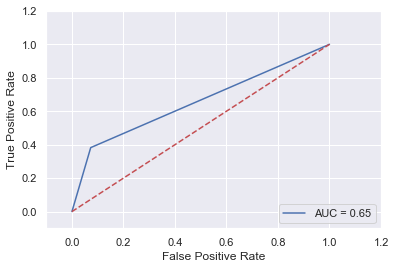

In [48]:
from sklearn import metrics
false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_test,  y_predicted)
roc_auc = metrics.auc(false_positive_rate, true_positive_rate)

plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## QDA

In [49]:
from scipy import linalg
import numpy

qda= Qda()

qda.train( pd.DataFrame(X_train,columns=x_train.columns),y_train)

y_predicted_train,prob1,prob2,d1,d2=qda.use(X_train)

y_predicted,prob1,prob2,d1,d2=qda.use(X_test)





non Singular
non Singular


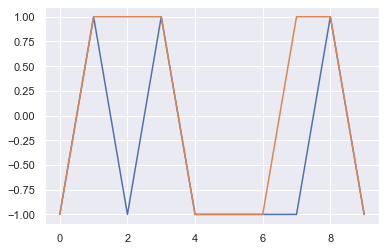

In [50]:
y=y_test[:10]
plt.plot(y)
plt.plot(y_predicted[:10])

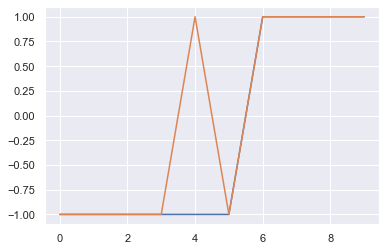

In [51]:
# for train
y=y_train[:10]
plt.plot(y)
plt.plot(y_predicted_train[:10])

### Analysis
From the above plots, the model performs good for train data as it has seen it already compare to the new data in X_test.

Text(0.5, 0.92, 'QDA P(x|Class=k)\n from disc funcs')

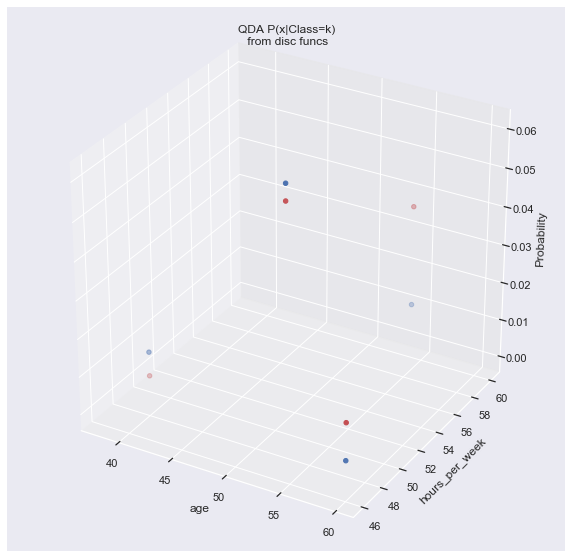

In [52]:
from mpl_toolkits.mplot3d import Axes3D
y_predicted,prob1,prob2,d1,d2 = qda.use(X_test[:4])    #predicted

#xs, ys = np.meshgrid(np.linspace(-2,4, 2), np.linspace(-4,5, 2))
x=pd.DataFrame(X_test[:4],columns=x_train.columns)
xs=x.loc[:,x.columns=='age']
ys=x.loc[:,x.columns=='hours_per_week']

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs+10,ys+10,prob1.reshape(xs.shape),c='r', marker='o')
ax.scatter(xs+10,ys+10,prob2.reshape(xs.shape),c='b', marker='o')
ax.set_xlabel('age')
ax.set_ylabel('hours_per_week')
ax.set_zlabel('Probability')
plt.title("QDA P(x|Class=k)\n from disc funcs")

### Analysis
Above is a 3-D scatter plot of the 2 attributes of test data (to plot an instance) and the probabilities predicted for each istance. For class with value 1 the points are marked in red and for value -1 with blue. From the above plot we can see which class will be returned for a particular instance. For example, for point, xs=57 and ys=49, the probabilty of class 1 is more than class 2 thus class 1 ie. value 1 will be returned for that instance as its probability is higher than the later.  

Text(0.5, 0.92, 'QDA Discriminant Functions')

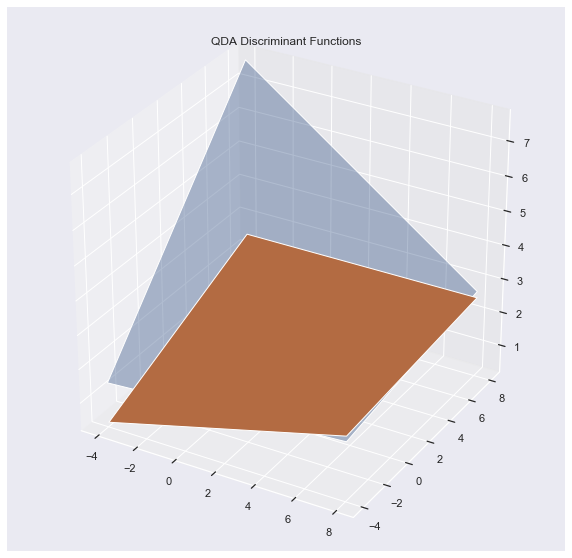

In [53]:
y_predicted,prob1,prob2,d1,d2 = qda.use(X_test[:4])    #predicted


xs, ys = np.meshgrid(np.linspace(-4,8, 2), np.linspace(-4,8, 2))
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.plot_surface(xs, ys, np.sort(-1 *d1.reshape(xs.shape),0), alpha=0.4)
ax.plot_surface(xs, ys, np.sort(-1 *d2.reshape(xs.shape),0), alpha=1)
plt.title("QDA Discriminant Functions")

### Analysis
This plot visualizes the the values of d1 and d2 for 4 data points represented by the 4 corners of the above quadrilaterals. for point, -4,-4 orange ie. d2 is less than blue ie. d1 thus the corresponding probability for class 1 will be more than class 2. Thus the value returned for that instance is 1.  

Text(0.5, 1.0, 'Decision Boundary')

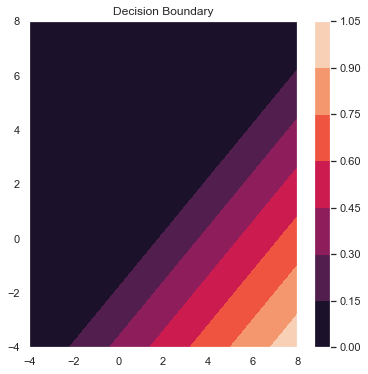

In [54]:
fig, ax = plt.subplots(figsize=(6,6))
cf=ax.contourf(xs, ys, (((d1-d2)) > 0).reshape(xs.shape))
fig.colorbar(cf, ax=ax)
plt.title("Decision Boundary")

### Analysis
Where xs and ys are 2D arrays of the x and y points, and Z is a 2D array of points that determines the "height" of the contour, which is represented by color in a 2D plot. The grade is also provided to estimate the value of z based on the color. 

## For Train data

### Accuracy

In [55]:
from sklearn.metrics import accuracy_score
print('Accuracy:', accuracy_score(y_train,y_predicted_train)*100,'%')


Accuracy: 70.49915005408747 %


### F1 Score

In [56]:
from sklearn.metrics import f1_score
print('F1 score:', f1_score(y_train,y_predicted_train))

F1 score: 0.5670220004536177


## For Test Data

### Confusion Matrix

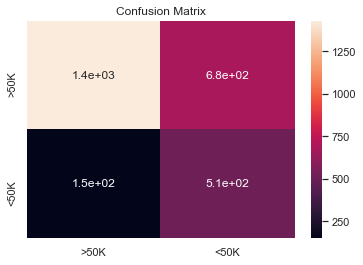

In [57]:
ax= plt.subplot()
y_predicted,prob1,prob2,d1,d2=qda.use(X_test)
cm= confusion_matrix(y_test, y_predicted)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
label=['>50K','<50K']
#sns.heatmap(cnf_matrix, annot=True, ax = ax)

df_cm = pd.DataFrame(cm, index = [i for i in label],columns = [i for i in label])
#plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)

In [58]:
tn, fp, fn, tp = confusion_matrix(y_test, y_predicted).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  1430
False Positives:  684
False Negatives:  150
True Positives:  509


### Accuracy

In [59]:
Accuracy = (tn+tp)*100/(tp+tn+fp+fn) 
print("Accuracy in %",Accuracy)

Accuracy in % 69.92426974395961


### Precision

In [60]:
Precision = tp/(tp+fp) 
print("Precision ",Precision)

Precision  0.4266554903604359


### Recall

In [61]:
Recall = tp/(tp+fn) 
print("Recall ",Recall)

Recall  0.7723823975720789


### specificity

In [62]:
specificity=tn/(tn+fp)
specificity

0.6764427625354777

### F1 Score

In [63]:
f1 = (2*Precision*Recall)/(Precision + Recall)
print("F1 Score",f1)

F1 Score 0.5496760259179266


### ROC AUC Score

In [64]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_predicted)

0.7244125800537784

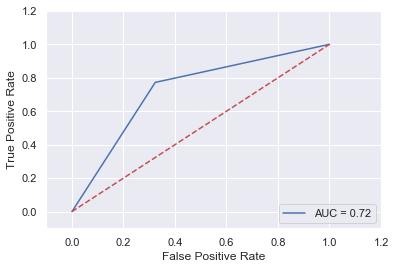

In [65]:
from sklearn import metrics
false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_test,  y_predicted)
roc_auc = metrics.auc(false_positive_rate, true_positive_rate)

plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# LDA

In [66]:
lda= LDA()

lda.train( pd.DataFrame(X_train,columns=x_train.columns),y_train)

y_predicted_train,d1,d2=lda.use(X_train)

y_predicted,d1,d2=lda.use(X_test)


(3, 3)
non Singular


## Plots

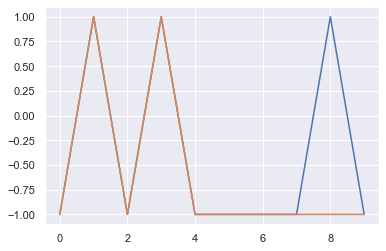

In [67]:
y=y_test[:10]
plt.plot(y)
plt.plot(y_predicted[:10])

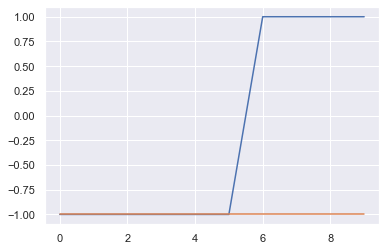

In [68]:
y=y_train[:10]
plt.plot(y)
plt.plot(y_predicted_train[:10])

### Analysis
From the above plots, the model performs good for train as well as train data 

Text(0.5, 0.92, 'LDA Discriminant Functions')

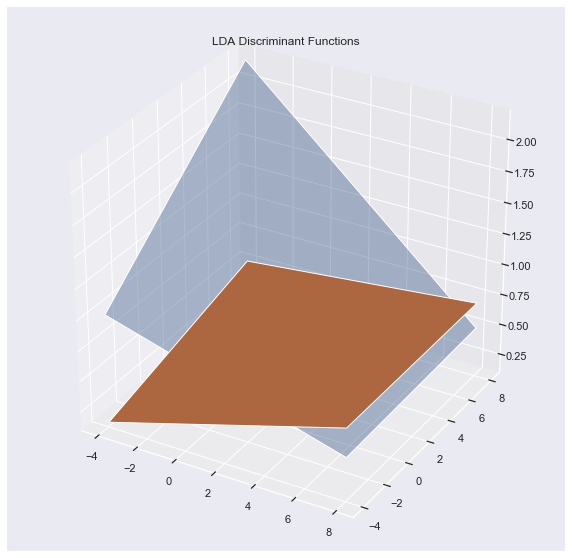

In [69]:
d1=d1[:4]
d2=d2[:4]

xs, ys = np.meshgrid(np.linspace(-4,8, 2), np.linspace(-4,8, 2))
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.plot_surface(xs, ys, np.sort(-1 *d1.reshape(xs.shape),0), alpha=0.4)
ax.plot_surface(xs, ys, np.sort(-1 *d2.reshape(xs.shape),0), alpha=1)
plt.title("LDA Discriminant Functions")

### Analysis
This plot visualizes the the values of d1 and d2 for 4 data points represented by the 4 corners of the above quadrilaterals. for point, -4,-4 orange ie. d2 is less than blue. Thus the value returned for that instance is 1.
For data point 7,-1 orange plot is above the blue one thus class 2 ie. value -1 will be returned for that datapoint

Text(0.5, 1.0, 'Decision Boundary')

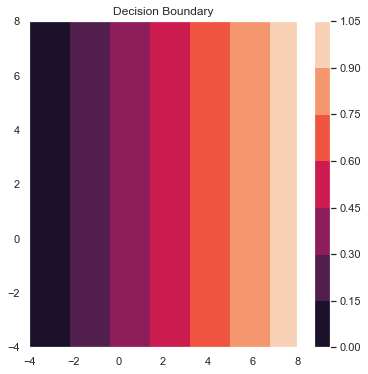

In [70]:
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(xs,ys,0,c='r', marker='o')
cf=ax.contourf(xs, ys, (((d1-d2)) > 0).reshape(xs.shape))
fig.colorbar(cf, ax=ax)
plt.title("Decision Boundary")

## For Train data

In [71]:
from sklearn.metrics import accuracy_score
print('Accuracy:', accuracy_score(y_train,y_predicted_train)*100,'%')

Accuracy: 77.29871735435017 %


In [72]:
from sklearn.metrics import f1_score
print('F1 score:', f1_score(y_train,y_predicted_train))

F1 score: 0.31896152063050537


## For Test Data

### Confusion Matrix

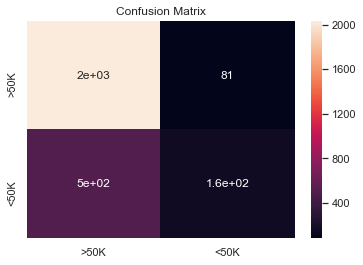

In [73]:
ax= plt.subplot()

cm= confusion_matrix(y_test, y_predicted)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
label=['>50K','<50K']
#sns.heatmap(cnf_matrix, annot=True, ax = ax)

df_cm = pd.DataFrame(cm, index = [i for i in label],columns = [i for i in label])
#plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)

In [74]:
tn, fp, fn, tp = confusion_matrix(y_test, y_predicted).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  2033
False Positives:  81
False Negatives:  500
True Positives:  159


### Accuracy

In [75]:
Accuracy = (tn+tp)*100/(tp+tn+fp+fn) 
print("Accuracy in %",Accuracy)

Accuracy in % 79.04796249549224


### Precision

In [76]:
Precision = tp/(tp+fp) 
print("Precision ",Precision)

Precision  0.6625


### Recall

In [77]:
Recall = tp/(tp+fn) 
print("Recall ",Recall)

Recall  0.24127465857359637


### specificity

In [78]:
specificity=tn/(tn+fp)
specificity

0.9616840113528855

### F1 Score

In [79]:
f1 = (2*Precision*Recall)/(Precision + Recall)
print("F1 Score",f1)

F1 Score 0.35372636262513907


### ROC

In [80]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_predicted)

0.6014793349632409

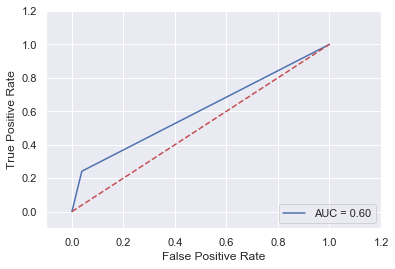

In [81]:
from sklearn import metrics
false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_test,  y_predicted)
roc_auc = metrics.auc(false_positive_rate, true_positive_rate)

plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Logistic Regression

In [82]:
logistic= Logistic(0.01)
logistic.train(X_train,y_train)

y_predicted_train=logistic.use(X_train)
#y_predicted_train = np.argmax(y_predicted_train, 1)
#y_predicted_train[y_predicted_train==0]=-1

y_predicted=logistic.use(X_test)
#y_predicted = np.argmax(y_predicted, 1)
#y_predicted[y_predicted==0]=-1

## Plots

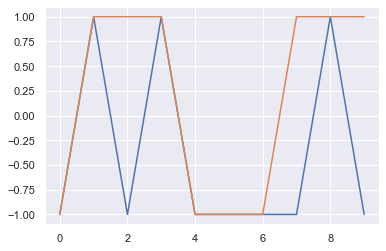

In [83]:
y=y_test[:10]
plt.plot(y)
plt.plot(y_predicted[:10])

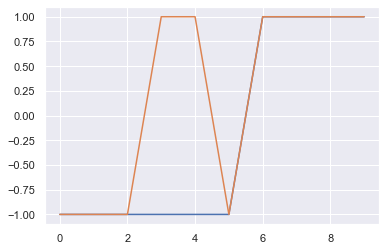

In [84]:
y=y_train[:10]
plt.plot(y)
plt.plot(y_predicted_train[:10])

### Analysis
The model performed better on the train data compared to the test data. Thus there can be a possibility of overfitting 

### For Train data

In [85]:
from sklearn.metrics import accuracy_score
print('Accuracy:', accuracy_score(y_train,y_predicted_train)*100,'%')

Accuracy: 69.3092257765415 %


In [86]:
from sklearn.metrics import f1_score
print('F1 score:', f1_score(y_train,y_predicted_train))

F1 score: 0.5389972144846796


### For Test Data

## Confusion Matrix

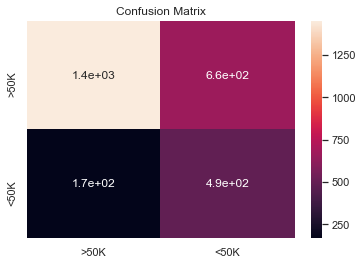

In [87]:
ax= plt.subplot()

cm= confusion_matrix(y_test, y_predicted)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
label=['>50K','<50K']
#sns.heatmap(cnf_matrix, annot=True, ax = ax)

df_cm = pd.DataFrame(cm, index = [i for i in label],columns = [i for i in label])
#plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)

In [88]:
tn, fp, fn, tp = confusion_matrix(y_test, y_predicted).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  1450
False Positives:  664
False Negatives:  168
True Positives:  491


### Accuracy

In [89]:
Accuracy = (tn+tp)*100/(tp+tn+fp+fn) 
print("Accuracy in %",Accuracy)

Accuracy in % 69.99639379733141


### Precision

In [90]:
Precision = tp/(tp+fp) 
print("Precision ",Precision)

Precision  0.4251082251082251


### Recall

In [91]:
Recall = tp/(tp+fn) 
print("Recall ",Recall)

Recall  0.7450682852807283


### specificity

In [92]:
specificity=tn/(tn+fp)
specificity

0.6859035004730369

### F1 Score

In [93]:
f1 = (2*Precision*Recall)/(Precision + Recall)
print("F1 Score",f1)

F1 Score 0.5413450937155457


### ROC AUC Score

In [94]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_predicted)

0.7154858928768826

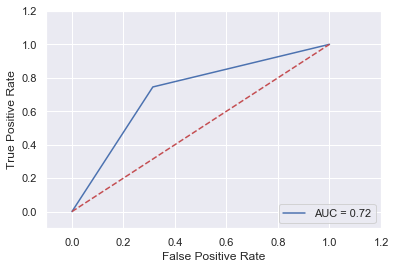

In [96]:
from sklearn import metrics
false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_test,  y_predicted)
roc_auc = metrics.auc(false_positive_rate, true_positive_rate)

plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Discussion on the train and test accuracies

## Pocket Algorithm

### For train data-
Accuracy: % 78.73589862463298

F1 score: 0.4620797498045348

### For test data
Accuarcy: % 79.76920302921025

f1: 0.4732394366197184

Precision: 0.6206896551724138

Specificity: 0.9271523178807947

Recall: 0.38239757207890746

ROC AUC Score: 0.654774944979851


There no much difference in the accuracies and f1 scores of train and test data, this implies that the model is not overfitting.Model also doesn't underfit as it is achieving good results.
For ROC AUC Score, the value should be near to 0 implying that the model can clearly classify between the two classes. For this model the ROC AUC score is 65% which means the Pocket is performing descently for the given dataset. 


Specificity and recall are inversely propotional as When we decrease the threshold, we get more positive values thus increasing the sensitivity/recall.
For pocket, specificity is higher which means it is able to predict True Negatives correctly of all the instances classified as negaative.
Thus, overall the model performed descently for the given datset


## QDA
### For train data-


Accuracy: 70.49915005408747 %

F1 score:0.5670220004536177


### For test data

Accuracy: % 69.92426974395961

Precision: 0.4266554903604359

Specificity: 0.6764427625354777

f1: 0.5496760259179266

Recall: 0.7723823975720789


ROC AUC Score: 0.7244125800537784

There no much difference in the accuracies and f1 scores of train and test data, this implies that the model is not overfitting or underfitting the data. Looking at the values of recall and specificity, QDA performed well in predicting actual positive and negative classes from all the instances classified as positive and negative respectively. 


## LDA
### For train data-


Accuracy: 77.29871735435017 %

F1 score: 0.31896152063050537

### For test data

Accuracy:79.04796249549224 %

F1 score: 0.35372636262513907

Precision: 0.6625

Specificity: 0.9616840113528855

Recall: 0.24127465857359637


ROC AUC Score: 0.6014793349632409

Looks like this model was not able to accurately predict the positive class from the data samples classsified as positive since the recall value is low. There no much difference in the accuracies and f1 scores of train and test data, this implies that the model is not overfitting or underfitting the data. 

As most of the samples roughly 70% fall under the category of income<=50K ie. class=-1 thus though the accuracy is high the recall score indicates that the model has not performed upto the mark



## Logistic Regression
### For train data-


Accuracy: 69.3092257765415 %

F1 score: 0.5389972144846796


### For test data

Accuracy: % 69.99639379733141

F1 score: 0.5413450937155457


Precision: 0.4251082251082251

Specificity: 0.9271523178807947

Recall: 0.7450682852807283


ROC AUC Score: 0.7154858928768826

There no much difference in the accuracies and f1 scores of train and test data, this implies that the model is not overfitting or underfitting the data. The scores for specificity and recall are both good that means the model is estimating accurately. The ROC score is good impying the model is able to classify on the two classes well. logistic regression and QDA scores are almost similar.


# Discussions about classificaion model comparison

F1 Score is the Harmonic mean of Precision & Recall, used to indicate a balance between Precision & Recall providing each equal weightage. ROC (Receiver Operating Characteristic) Curve tells us about how good the model can distinguish between two things. Thus there are good metric to consider for evaluation.
From the above results, it can be stated that QDA out performed all the othet models in terms of all the metrics. The next best model for this dataset was Logistic Regression, Followed by Pocket and the least was LDA. 
Though LDA has a good accuracy, its recall rate and thus the f1 score is low implying it was not able to distinguish between the classes well.

While Pocket performed better than LDA, the computational time for the same was too high compare to LDA. QDA is able to predict better than the others since it used more class specific attributes than LDA and thus was flexible and accurate.


### pocket
Accuracy :79.76920302921025

recall: 0.38239757207890746

f1: 0.4732394366197184

specificity: 0.9271523178807947

roc auc score: 0.654774944979851

### QDA
Accuracy : % 69.92426974395961

recall: 0.7723823975720789

specificity: 0.6764427625354777

f1 : 0.5496760259179266

roc auc score: 0.7244125800537784

### LDA
Accuracy: % 79.04796249549224

recall: 0.24127465857359637

specificity: 0.9616840113528855

f1: 0.35372636262513907

roc auc score: 0.6014793349632409


### Logistic Regression
Accuracy: % 69.99639379733141

F1 score: 0.5413450937155457

Precision: 0.4251082251082251

Specificity: 0.9271523178807947

Recall: 0.7450682852807283

ROC AUC Score: 0.7154858928768826

# Conclusions

Different classification models were implemented and compared as a part of this assignment. Binary classification was performed on the dataset. From the evaluation metrics results for all the models, it can be concluded that QDA fitted the data well than the others. The performances are- QDA>Logistic Regression>Pocket>LDA. Though LDA has a good accuracy, its recall rate and thus the f1 score is low implying it was not able to distinguish between the classes well. Also,though Pocket performed better tha LDA, its computational time was very high compare to LDA thus this trade off should also be consider while choosing the model. The models were evaluated mainly on their AUC score and F1 score. 

In every train method, data is normalized so that the models are not affected by the outliers or noise. This has a great impact on the model's performance.The different visualization plots between dependent and independent and within the independent variables tells a lot about the correlation between the data. This information can be used for selecting relevant features for training the model. Thus to construct a accurate model for the given data, every step from preprocessing, visualizing, selecting the relevant features to bulding a model are crutial.

From this assgignment I got a better understanding about the different classification model's working. Also, I learned about the evaluation metrics and when to use which metric and importance of each one of them. The main challenge was to represent multi-dimentional data onto just 3-dimentions and understanding the plots. Thus, working on this assignment further added to my understanding about Machine learning and its importance    



# References


Ronny Kohavi and Barry Becker 'Adult Data Set' https://archive.ics.uci.edu/ml/datasets/Adult

(https://archive.ics.uci.edu/ml/datasets/Adult)


SalRite, 'Demystifying ‘Confusion Matrix’ Confusion' https://towardsdatascience.com/demystifying-confusion-matrix-confusion-9e82201592fd

(https://towardsdatascience.com/demystifying-confusion-matrix-confusion-9e82201592fd)



Parag Radke, 'Gaussian Discriminant Analysis an example of Generative Learning Algorithms' https://towardsdatascience.com/gaussian-discriminant-analysis-an-example-of-generative-learning-algorithms-2e336ba7aa5c

(https://towardsdatascience.com/gaussian-discriminant-analysis-an-example-of-generative-learning-algorithms-2e336ba7aa5c)


Minwoo Jake Lee, 'Linear Model for Classification'
https://nbviewer.jupyter.org/url/webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/notes/Note-Linear%20Classification.Sol.ipynb

(https://nbviewer.jupyter.org/url/webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/notes/Note-Linear%20Classification.Sol.ipynb)


Minwoo Jake Lee, 'Classification Note' https://nbviewer.jupyter.org/url/webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/notes/Note-Classification.ipynb

(https://nbviewer.jupyter.org/url/webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/notes/Note-Classification.ipynb)


Dipanjan (DJ) Sarkar,'Effective Visualization of Multi-Dimensional Data — A Hands-on Approach'
https://medium.com/swlh/effective-visualization-of-multi-dimensional-data-a-hands-on-approach-b48f36a56ee8

(https://medium.com/swlh/effective-visualization-of-multi-dimensional-data-a-hands-on-approach-b48f36a56ee8)